In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [27]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def distance(self, other):
        return np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)

In [28]:
class Ant:
    def __init__(self, num_cities):
        self.num_cities = num_cities
        self.tour = []
        self.distance_traveled = 0
    def clear(self):
        self.tour = []
        self.distance_traveled = 0

    def build_tour(self, phermone, cities, alpha=1 ,beta=1):
        self.clear()
        num_cities = self.num_cities
        unvisited = list(range(num_cities))
        current_city = np.random.choice(unvisited)
        self.tour.append(current_city)
        unvisited.remove(current_city)

        while unvisited:
            probababilities = []
            for next_city in unvisited:
                tau = phermone[current_city][next_city] ** alpha
                eta = (1 / cities[current_city].distance(cities[next_city])) ** beta
                probababilities.append(tau * eta)

            probababilities = np.array(probababilities)
            probababilities /= np.sum(probababilities)
            next_city = np.random.choice(unvisited, p=probababilities)
            self.tour.append(next_city)
            unvisited.remove(next_city)
            current_city = next_city
        self.tour.append(self.tour[0])

        self.total_distance = 0
        for i in range(len(self.tour) - 1):
            self.total_distance += cities[self.tour[i]].distance(cities[self.tour[i + 1]])

In [29]:
def initialize_pheromone(num_cities, initial_pheromone):
    return np.ones((num_cities, num_cities)) * initial_pheromone

In [30]:
def update_pheromones(pheromone, ants, evaporation_rate=0.5, Q=100):
    num_cities = len(pheromone)
    pheromone *= (1 - evaporation_rate)

    for ant in ants:
        for i in range(len(ant.tour) - 1):
            from_city = ant.tour[i]
            to_city = ant.tour[i + 1]
            pheromone[from_city][to_city] += Q / ant.total_distance
            pheromone[to_city][from_city] += Q / ant.total_distance 
            


In [31]:
def select_top_ants(ants, num_selected):
    sorted_ants = sorted(ants, key=lambda a: a.total_distance)
    return sorted_ants[:num_selected]

In [32]:
def order_crossover(parent1,parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))

    child = [-1] * size
    child[start:end+1] = parent1[start:end+1]

    ptr = (end + 1) % size
    for city in parent2:
        if city not in child:
            child[ptr] = city
            ptr = (ptr + 1) % size
    return child

In [33]:
def mutate(tour, mutation_rate=0.1):
    tour = tour[:]
    if random.random() < mutation_rate:
        i , j = random.sample(range(len(tour)), 2)
        tour[i], tour[j] = tour[j], tour[i]
    return tour

In [34]:
def generate_children(top_ants, num_children, mutation_rate=0.1):
    children = []

    while len(children) < num_children:
        parent1 = random.choice(top_ants).tour
        parent2 = random.choice(top_ants).tour

        if parent1 != parent2:
            child_tour = order_crossover(parent1, parent2)
            child_tour = mutate(child_tour, mutation_rate)
            children.append(child_tour)

    return children


In [35]:
def replace_worst_ants(ants,children_tours, cities):
    ants.sort(key=lambda a: a.total_distance, reverse=True)

    for i in range(len(children_tours)):
        new_ant = Ant(len(cities))
        new_ant.tour = children_tours[i]

        new_ant.total_distance = sum(cities[new_ant.tour[i]].distance(cities[new_ant.tour[i + 1]]) for i in range(len(new_ant.tour) - 1))
        ants[-(i+1)] = new_ant

In [36]:


def plot_tour(cities, tour):
    x = [cities[i].x for i in tour] + [cities[tour[0]].x]
    y = [cities[i].y for i in tour] + [cities[tour[0]].y]
    plt.plot(x, y, 'ro-')
    plt.title('Best Tour Found by ACO')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()



Iteration 0/20 - Best Distance: 308.1118434260997
Iteration 1/20 - Best Distance: 308.1118434260997
Iteration 2/20 - Best Distance: 308.1118434260997
Iteration 3/20 - Best Distance: 308.1118434260997
Iteration 4/20 - Best Distance: 308.1118434260997
Iteration 5/20 - Best Distance: 308.1118434260997
Iteration 6/20 - Best Distance: 308.11184342609965
Iteration 7/20 - Best Distance: 308.11184342609965
Iteration 8/20 - Best Distance: 308.11184342609965
Iteration 9/20 - Best Distance: 308.11184342609965
Iteration 10/20 - Best Distance: 308.11184342609965
Iteration 11/20 - Best Distance: 308.11184342609965
Iteration 12/20 - Best Distance: 308.11184342609965
Iteration 13/20 - Best Distance: 308.11184342609965
Iteration 14/20 - Best Distance: 308.11184342609965
Iteration 15/20 - Best Distance: 308.11184342609965
Iteration 16/20 - Best Distance: 308.11184342609965
Iteration 17/20 - Best Distance: 308.11184342609965
Iteration 18/20 - Best Distance: 308.11184342609965
Iteration 19/20 - Best Dista

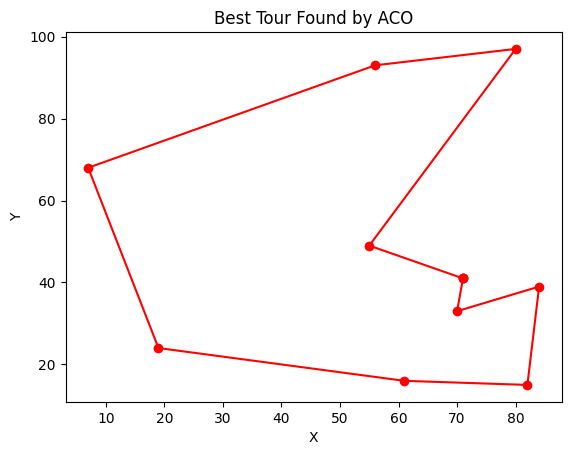

In [41]:
if __name__ == "__main__":
    num_cities = 10
    cities = [City(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_cities)]

    initial_pheromone = 1.0
    pheromone = initialize_pheromone(num_cities, initial_pheromone)

    num_ants = 50
    ants = [Ant(num_cities) for _ in range(num_ants)]

    num_iterations = 20
    ga_interval = 10  
    best_tour = None
    best_distance = float("inf")

    for iteration in range(num_iterations):
        for ant in ants:
            ant.clear()
            ant.build_tour(pheromone, cities, alpha=1, beta=2)

        update_pheromones(pheromone, ants, evaporation_rate=0.1, Q=100)

        for ant in ants:
            if ant.total_distance < best_distance:
                best_distance = ant.total_distance
                best_tour = ant.tour

        if iteration % ga_interval == 0 and iteration != 0:
            top_ants = select_top_ants(ants, num_selected=10)
            children_tours = generate_children(top_ants, num_children=10, mutation_rate=0.1)
            replace_worst_ants(ants, children_tours, cities)

        print(f"Iteration {iteration}/{num_iterations} - Best Distance: {best_distance}")

    print("Best Tour:", [int(city) for city in best_tour])
    print("Best Distance:", best_distance)

    plot_tour(cities, best_tour)
